In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [3]:
# Bank Marketing Dataset
bank_df = pd.read_csv("bank-additional-full.csv")

In [4]:
# Print shape/head
print("Bank Dataset:")
print(bank_df.shape)
print(bank_df.head())

Bank Dataset:
(41188, 20)
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         0  nonexistent           1.1   
2   may         mon         1    999         0  nonexistent           1.1   
3   may         mon         1    999         0  nonexistent           1.1   
4   may         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employ

In [5]:
# Print unique values
print("Unique values in 'y':", bank_df['y'].unique())

Unique values in 'y': ['no' 'yes']


In [20]:
# Map 'no' to 0 and 'yes' to 1
bank_df['y'] = bank_df['y'].map({'no': 0, 'yes': 1})

# Confirm it's done
print(bank_df['y'].value_counts(dropna=False))
print("Missing values in y:", bank_df['y'].isna().sum())

y
NaN    41188
Name: count, dtype: int64
Missing values in y: 41188


In [19]:
# Encode all categorical columns (object type) using One-Hot Encoding
categorical_cols = bank_df.select_dtypes(include='object').columns.tolist() 

bank_df = pd.get_dummies(bank_df, columns=categorical_cols, drop_first=True)

# Separate features and target
X_bank = bank_df.drop('y', axis=1)
y_bank = bank_df['y']

# Scale features
scaler = StandardScaler()
X_bank_scaled = scaler.fit_transform(X_bank)

# Train/test split
X_bank_train, X_bank_test, y_bank_train, y_bank_test = train_test_split(
    X_bank_scaled, y_bank, test_size=0.2, random_state=42, stratify=y_bank
)

print("Positive class rate:", y_bank.mean())
print("Train shape:", X_bank_train.shape)
print("Test shape:", X_bank_test.shape)

Positive class rate: 0.11265417111780131
Train shape: (32950, 52)
Test shape: (8238, 52)


In [10]:
# Logistic Regression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_bank_train, y_bank_train)

y_pred_lr = model_lr.predict(X_bank_test)

print("Logistic Regression - Bank Dataset:\n")
print(classification_report(y_bank_test, y_pred_lr))

Logistic Regression - Bank Dataset:

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.69      0.22      0.34       928

    accuracy                           0.90      8238
   macro avg       0.80      0.61      0.64      8238
weighted avg       0.88      0.90      0.88      8238



In [11]:
# Random Forest 
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_bank_train, y_bank_train)

y_pred_rf = model_rf.predict(X_bank_test)

print("Random Forest - Bank Dataset:\n")
print(classification_report(y_bank_test, y_pred_rf))

Random Forest - Bank Dataset:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7310
           1       0.57      0.30      0.40       928

    accuracy                           0.90      8238
   macro avg       0.75      0.64      0.67      8238
weighted avg       0.88      0.90      0.88      8238



In [12]:
# XGBoost 
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_bank_train, y_bank_train)

y_pred_xgb = model_xgb.predict(X_bank_test)

print("XGBoost - Bank Dataset:\n")
print(classification_report(y_bank_test, y_pred_xgb))

XGBoost - Bank Dataset:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7310
           1       0.62      0.30      0.40       928

    accuracy                           0.90      8238
   macro avg       0.77      0.64      0.68      8238
weighted avg       0.88      0.90      0.88      8238



C:\Users\ilham_7t2frur\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:26:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [13]:
# Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_bank_train, y_bank_train)
y_pred_dt = model_dt.predict(X_bank_test)

print("Decision Tree - Bank Dataset:\n")
print(classification_report(y_bank_test, y_pred_dt))

Decision Tree - Bank Dataset:

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7310
           1       0.31      0.33      0.32       928

    accuracy                           0.84      8238
   macro avg       0.61      0.62      0.61      8238
weighted avg       0.85      0.84      0.84      8238



In [14]:
# K-Nearest Neighbors
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_bank_train, y_bank_train)
y_pred_knn = model_knn.predict(X_bank_test)

print("KNN - Bank Dataset:\n")
print(classification_report(y_bank_test, y_pred_knn))

KNN - Bank Dataset:

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7310
           1       0.58      0.28      0.38       928

    accuracy                           0.90      8238
   macro avg       0.74      0.63      0.66      8238
weighted avg       0.88      0.90      0.88      8238



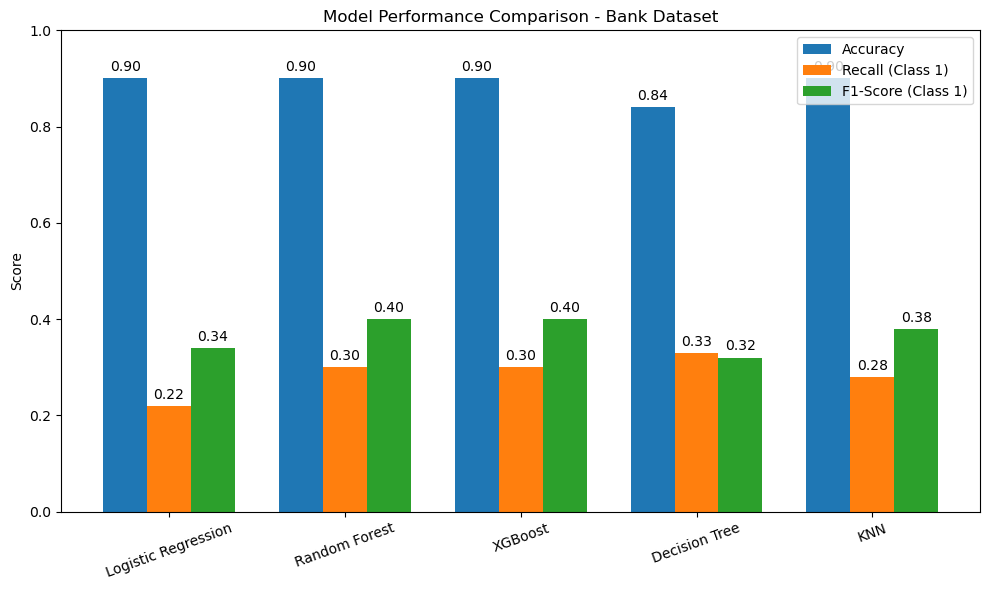

In [15]:
# Model names
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'Decision Tree', 'KNN']

# Corresponding metrics for class 1
accuracy = [0.90, 0.90, 0.90, 0.84, 0.90]
recall_1 = [0.22, 0.30, 0.30, 0.33, 0.28]
f1_1 = [0.34, 0.40, 0.40, 0.32, 0.38]

# Bar chart setup
x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x, recall_1, width, label='Recall (Class 1)')
rects3 = ax.bar(x + width, f1_1, width, label='F1-Score (Class 1)')

# Labels and title
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison - Bank Dataset')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=20)
ax.set_ylim([0, 1])
ax.legend()

# Add value labels on top of each bar
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

plt.tight_layout()
plt.show()


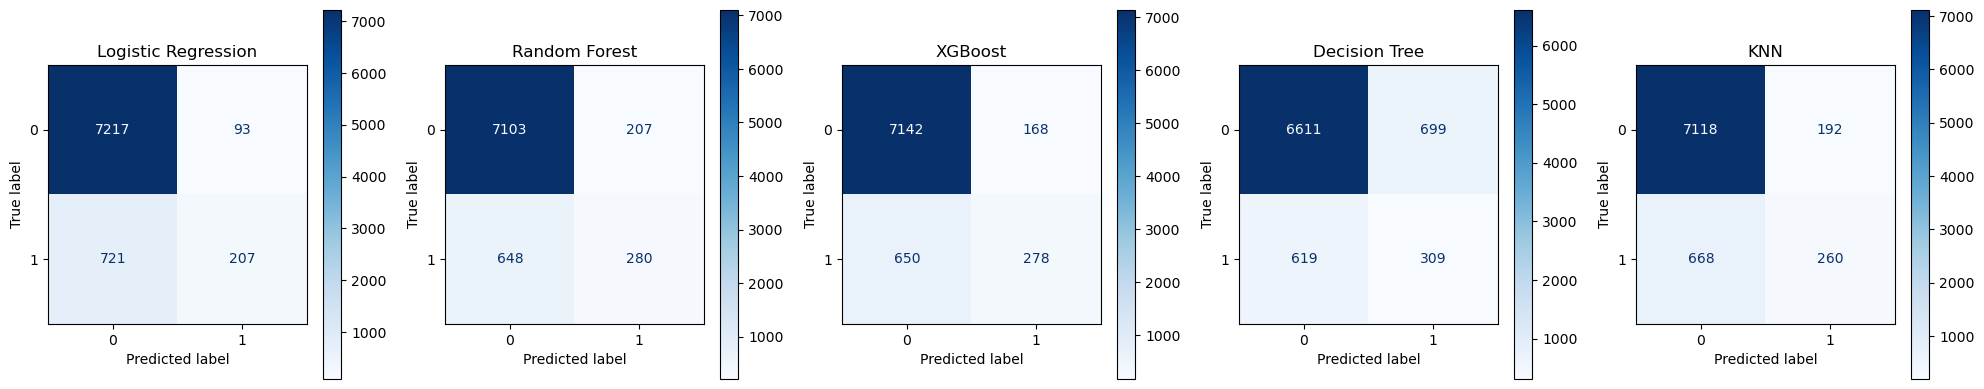

In [16]:
# Define predictions and model names
models = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "Decision Tree": y_pred_dt,
    "KNN": y_pred_knn
}

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Plot confusion matrices
for ax, (name, y_pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_bank_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, values_format='d', cmap='Blues')
    ax.set_title(name)

plt.tight_layout()
plt.show()

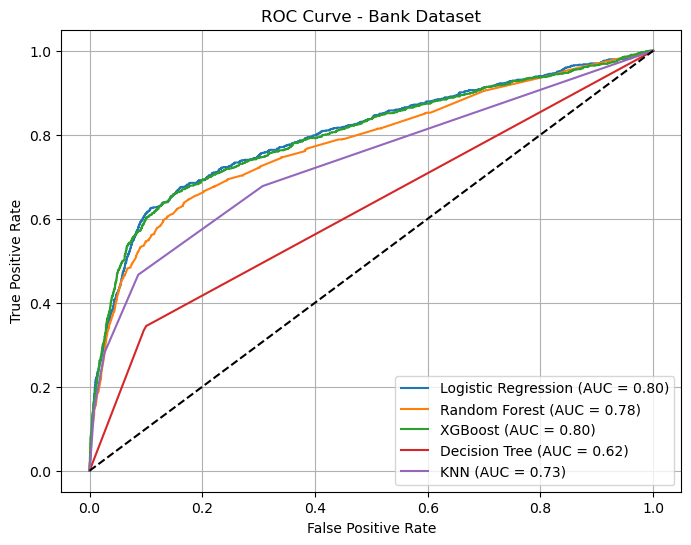

In [17]:
# Get probabilities for class 1 (positive class)
y_prob_lr = model_lr.predict_proba(X_bank_test)[:, 1]
y_prob_rf = model_rf.predict_proba(X_bank_test)[:, 1]
y_prob_xgb = model_xgb.predict_proba(X_bank_test)[:, 1]
y_prob_dt = model_dt.predict_proba(X_bank_test)[:, 1]
y_prob_knn = model_knn.predict_proba(X_bank_test)[:, 1]

# Model probabilities dictionary 
models_probs = {
    "Logistic Regression": y_prob_lr,
    "Random Forest": y_prob_rf,
    "XGBoost": y_prob_xgb,
    "Decision Tree": y_prob_dt,
    "KNN": y_prob_knn
}

# Plot ROC curves
plt.figure(figsize=(8,6))

for name, y_prob in models_probs.items():
    fpr, tpr, _ = roc_curve(y_bank_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Bank Dataset")
plt.legend()
plt.grid(True)
plt.show()



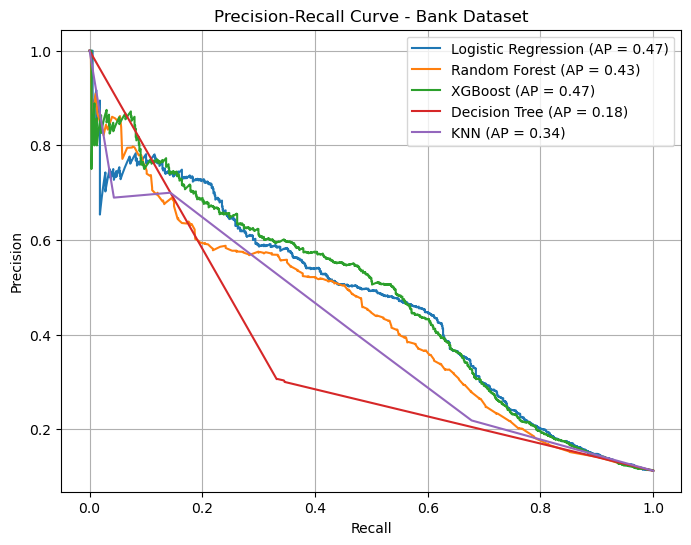

In [18]:
# Dictionary of model probabilities
plt.figure(figsize=(8,6))

# Plot Precision-Recall curve for each model
for name, y_prob in models_probs.items():
    precision, recall, _ = precision_recall_curve(y_bank_test, y_prob)
    avg_prec = average_precision_score(y_bank_test, y_prob)
    plt.plot(recall, precision, label=f"{name} (AP = {avg_prec:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Bank Dataset")
plt.legend()
plt.grid(True)
plt.show()
